In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Processed_Reviews_with_labels.csv",encoding="ISO-8859-1") 
df.shape

(13, 15)

In [3]:
df.head()

,Review,lowercased,urls_removed,html_removed,emojis_removed,slangs_replaced,contractions_replaced,punctuations_removed,numbers_removed,spelling_corrected,stopwords_removed,stemmed_words,lemmatized,tokenized,label
0,The product arrived on time. Packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,product arrived time packaging great quality a...,product arriv time packag great qualiti amaz,product arrive time packaging great quality am...,"['product', 'arrive', 'time', 'packaging', 'gr...",1
1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing i love it,this product is just amazing i love it,this product is just amazing i love it,product amazing love,product amaz love,product amaze love,"['product', 'amaze', 'love']",1
2,"I bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...",i bought this phone for 799 and it has a 120hz...,i bought this phone for and it has a hz displ...,i bought this phone for and it has a hz displ...,bought phone hz display totally worth,bought phone hz display total worth,buy phone hz display totally worth,"['buy', 'phone', 'hz', 'display', 'totally', '...",0
3,Wow!!! This product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow product awesome bit expensive,wow product awesom bit expens,wow product awesome bit expensive,"['wow', 'product', 'awesome', 'bit', 'expensive']",1
4,The laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine,the laptop works perfectly fine,the laptop works perfectly fine,laptop works perfectly fine,laptop work perfectli fine,laptop work perfectly fine,"['laptop', 'work', 'perfectly', 'fine']",1


In [4]:
df.groupby('label').describe() 

Review                                                                 \
       count unique                                                top freq   
label                                                                         
0          3      3  I bought this phone for $799, and it has a 120...    1   
1         10     10  The product arrived on time. Packaging was gre...    1   

      lowercased                                                            \
           count unique                                                top   
label                                                                        
0              3      3  i bought this phone for $799, and it has a 120...   
1             10     10  the product arrived on time. packaging was gre...   

           urls_removed         ...  \
      freq        count unique  ...   
label                           ...   
0        1            3      3  ...   
1        1           10     10  ...   

                                      stemmed_words      lemmatized         \
                                                top freq      count unique   
label                                                                        
0               bought phone hz display total worth    1          3      3   
1      product arriv time packag great qualiti amaz    1         10     10   

                                                              tokenized  \
                                                     top freq     count   
label                                                                     
0                     buy phone hz display totally worth    1         3   
1      product arrive time packaging great quality am...    1        10   

                                                                      
      unique                                                top freq  
label                                                                 
0          3  ['buy', 'phone', 'hz', 'display', 'totally', '...    1  
1         10  ['product', 'arrive', 'time', 'packaging', 'gr...    1  

[2 rows x 56 columns]

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vect = TfidfVectorizer() 
 
X = tfidf_vect.fit_transform(df['lemmatized']) 
y = df['label']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

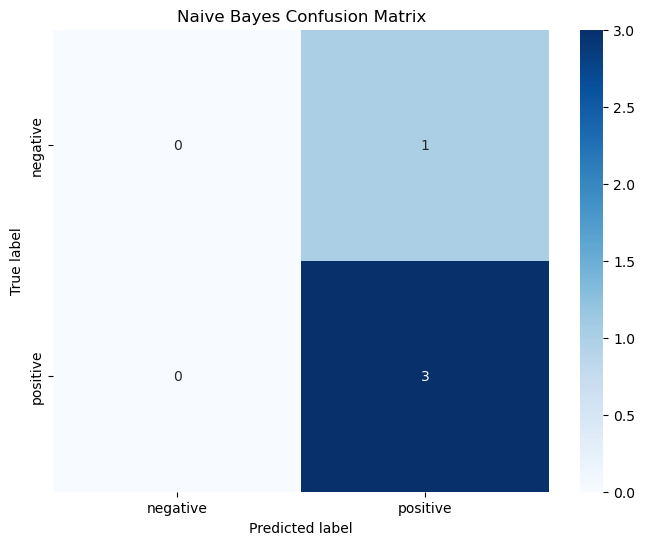

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.88      0.50      0.43         4
weighted avg       0.81      0.75      0.64         4


Naive Bayes Error Rate: 0.25


In [7]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)
nb_report = classification_report(y_test, y_pred, zero_division=1)

# Calculate error rate for Naive Bayes 
nb_error_rate = 1 - accuracy_score(y_test, y_pred) 
nb_cm = confusion_matrix(y_test, y_pred)


# Function to plot confusion matrix 
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues): 
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, 
yticklabels=classes) 
    plt.title(title) 
    plt.xlabel('Predicted label') 
    plt.ylabel('True label') 
    plt.show() 
 
# Plot confusion matrix for Naive Bayes 
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix') 
 
print("Naive Bayes Classifier Report:") 
print(nb_report) 
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}") 

Accuracy: 0.75
Precision: 0.75
Recall: 1.00
F1-Score: 0.86


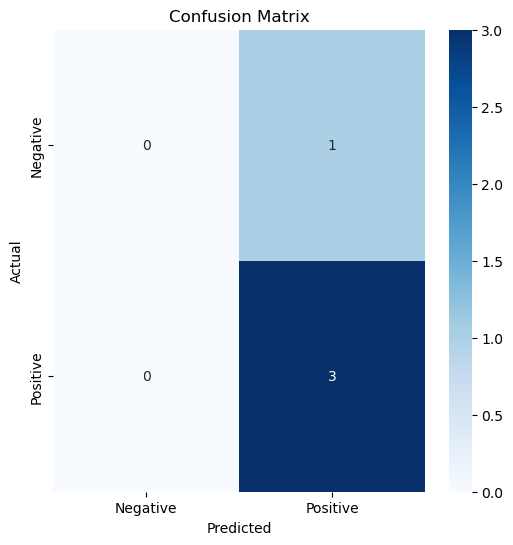

In [8]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()